In [1]:
import pandas as pd

In [2]:
ri = pd.read_csv('police.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


<h1> 1. Cleaning </h1>

In [3]:
#Locate Missing Values
ri.isnull()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91737,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91738,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91739,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


In [4]:
# count the number of missing values
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [5]:
ri.shape

(91741, 15)

In [8]:
# since that column only contain NaNs
ri.drop('county_name', axis='columns', inplace=True)

In [9]:
# since these two columns are critical to the analysis. 
# NaNs rows should be dropped.
ri.dropna(subset=['stop_date', 'stop_time', 'driver_gender'], inplace=True)

In [10]:
#check data type
ri.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [11]:
ri.is_arrested.head()

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object

In [14]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')
ri.is_arrested.dtype

dtype('bool')

In [21]:
# combine stop_date and stop_time into one column and 
#convert it to a date
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.stop_datetime.dtype

dtype('<M8[ns]')

In [22]:
ri['stop_datetime']

0       2005-01-04 12:55:00
1       2005-01-23 23:15:00
2       2005-02-17 04:15:00
3       2005-02-20 17:15:00
4       2005-02-24 01:20:00
                ...        
91736   2015-12-31 21:21:00
91737   2015-12-31 21:59:00
91738   2015-12-31 22:04:00
91739   2015-12-31 22:09:00
91740   2015-12-31 22:47:00
Name: stop_datetime, Length: 91741, dtype: datetime64[ns]

In [23]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=91741, freq=None)
Index(['state', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


<h1> 2. Exploring and Analyzing </h1>

In [25]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               48424
Moving violation       16224
Equipment              10922
Other                   4410
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559563
Moving violation       0.187476
Equipment              0.126209
Other                  0.050960
Registration/plates    0.042790
Seat belt              0.033002
Name: violation, dtype: float64


In [27]:
# Create a DataFrame of female drivers
female = ri[ri['driver_gender']=='F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender']=='M']

# Compute the violations by female drivers (as proportions)
print(female['violation'].value_counts(normalize=True))
print('\n')
# Compute the violations by male drivers (as proportions)
print(male['violation'].value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [32]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri['driver_gender']=='F')&(ri['violation']=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri['driver_gender']=='M')&(ri['violation']=='Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding['stop_outcome'].value_counts(normalize=True))
print('\n')
# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding['stop_outcome'].value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [34]:
# Check the data type of 'search_conducted'
print(ri['search_conducted'].dtype)

# Calculate the search rate by counting the values
print(ri['search_conducted'].value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri['search_conducted'].mean())


bool
False    0.963953
True     0.036047
Name: search_conducted, dtype: float64
0.03604713268876511


In [35]:
# Calculate the search rate for both males and females simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [36]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


In [37]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


In [43]:
# Count the 'search_type' values
print(ri['search_type'].value_counts())
print('\n')

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri['frisk'].sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [45]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched['frisk'].mean())
print('\n')
# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065


driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


In [55]:
# Calculate the overall arrest rate
print(ri['is_arrested'].mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.09025408486936048
stop_datetime
0     0.121206
1     0.144250
2     0.144120
3     0.148370
4     0.179310
5     0.178899
6     0.043614
7     0.053497
8     0.073591
9     0.070199
10    0.069306
11    0.075217
12    0.087040
13    0.078964
14    0.080171
15    0.080526
16    0.089505
17    0.107914
18    0.089883
19    0.078508
20    0.091482
21    0.153265
22    0.110715
23    0.108225
Name: is_arrested, dtype: float64


<h1> 3. Visualization </h1>

In [56]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

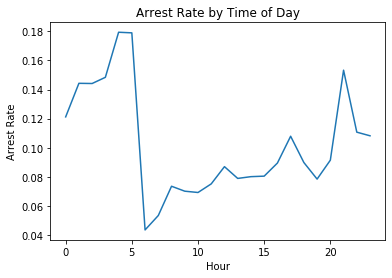

In [57]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
plt.plot(hourly_arrest_rate)

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

In [60]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


stop_datetime
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


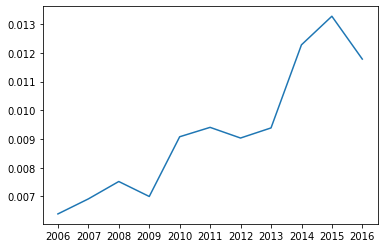

In [61]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
plt.plot(annual_drug_rate)

# Display the plot
plt.show()

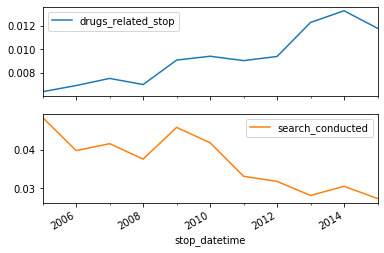

In [62]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate ], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

In [63]:
print(pd.crosstab(ri.district, ri.violation))


violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


In [64]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

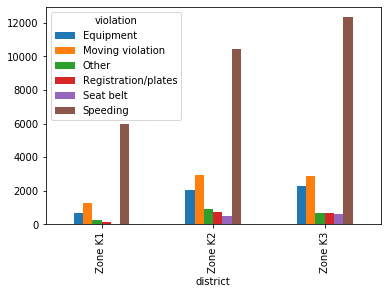

In [65]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

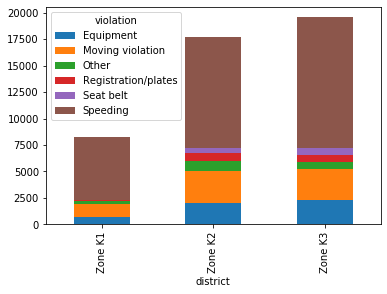

In [66]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

In [67]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())


['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


In [71]:
print(ri.groupby('violation_raw').stop_minutes.mean())


violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


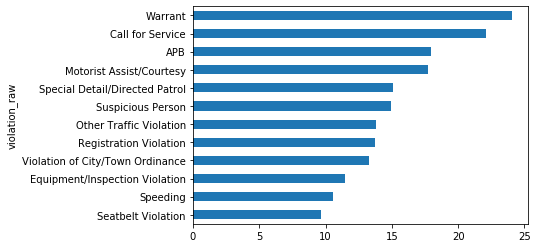

In [72]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

<h1> 4. Weather Data Analysis </h1>

In [75]:
weather = pd.read_csv('weather.csv')
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [76]:
#AWND: Averagge Wind Speed in miles per hour.
# WSF2: The fastest 2-minute wind speed 
#(i.e the fastest wind speed during any 2-minute period)
weather[['AWND', 'WSF2']].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


In [77]:
weather[['AWND', 'WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


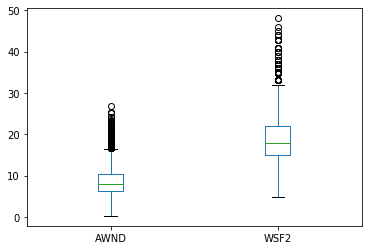

In [78]:
weather[['AWND', 'WSF2']].plot(kind='box')
plt.show()

In [79]:
#Validate that the fastest wind speed values are 
#greater than the average values for every single row.
weather['WDIFF'] = weather.WSF2 - weather.AWND

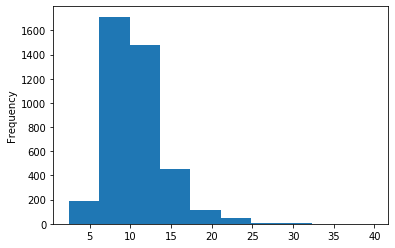

In [80]:
weather['WDIFF'].plot(kind='hist')
plt.show()

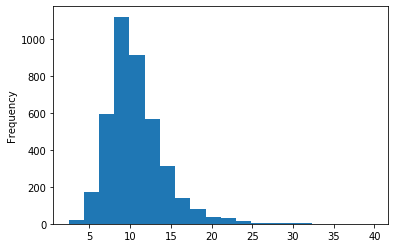

In [81]:
weather['WDIFF'].plot(kind='hist', bins=20)
plt.show()

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


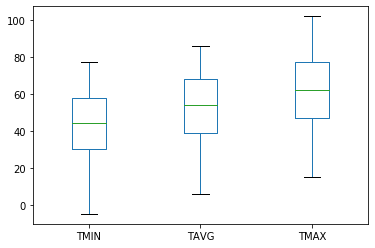

In [82]:
# Describe the temperature columns
print(weather[['TMIN','TAVG','TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN','TAVG','TMAX']].plot(kind='box')

# Display the plot
plt.show()

<text>The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.</text>

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


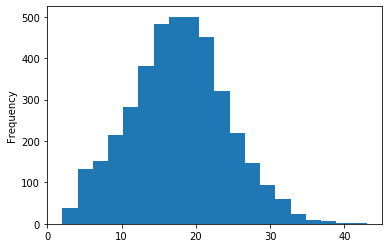

In [83]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather['TDIFF'].plot(kind='hist', bins=20)

# Display the plot
plt.show()

<text>The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.</text>

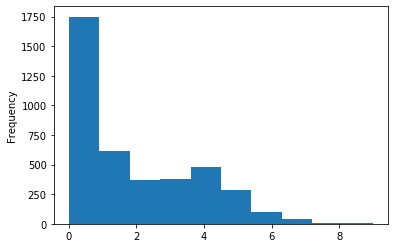

In [87]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

In [93]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())
print('\n')
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad', 5:'worse',6:'worse',7:'worse', 8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())
print('\n')
print(weather.rating.value_counts().unique())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


bad      1836
good     1749
worse     432
Name: rating, dtype: int64


[1836 1749  432]


In [96]:
# Create a list of weather ratings in logical order
cats= ['good','bad','worse']

# Change the data type of 'rating' to category
from pandas.api.types import CategoricalDtype
weather['rating'] = weather.rating.astype(CategoricalDtype(categories=cats))

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good, bad, worse]


<h1> 5. Relationship between weather and police behavior </h1>
<p>Checking if there is a relationship between 
the weather and police behavior.</p>

In [99]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather.loc[:,['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime state   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00    RI  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00    RI  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00    RI  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00    RI  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00    RI  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_relat

In [100]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(91741, 17)
(91741, 19)


<h3> • Does weather affect the arrest rate?</h3>

In [102]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation','rating']).is_arrested.mean())

0.09025408486936048
rating
good     0.086842
bad      0.090479
worse    0.106527
Name: is_arrested, dtype: float64
violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [103]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [106]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate['Moving violation']['bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate['Speeding'])

violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64
0.05804964058049641
rating
good     0.013404
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


In [107]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.058995  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076923  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013404  0.013314  0.016886
rating                   good       bad     worse
violation                                        
Equipment            0.058995  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076923  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013404  0.013314  0.016886
